In [25]:
import numpy as np
import pandas as pd
from grammars.base import LegoGram
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
smiles = list(pd.read_csv("grammars/data/250k_rndm_zinc_drugs_clean.smi", header = None)[0])

In [3]:
model = LegoGram(smiles = smiles, nworkers = 8)

Creating lg model via smiles
Calculating freqs first



Calculating freqs second



Run calc compat function


In [7]:
import torch

In [8]:
torch.save(model, "pickle/model.pt")

In [10]:
encoded_smiles = []
for smile in tqdm(smiles):
    encoded_smiles.append(model.encode(smile))

100%|██████████| 249456/249456 [14:23<00:00, 288.73it/s]


In [11]:
torch.save(encoded_smiles, "pickle/encoded_smiles.pt")

In [16]:
from grammars.grammar import canonize_smile

In [17]:
canonical_smiles = list(map(canonize_smile, smiles))

In [22]:
#Test encode - decode
flag = False
for idx, elem in enumerate(tqdm(encoded_smiles)):
    if canonical_smiles[idx] != canonize_smile(model.decode(elem)):
        flag = True
if flag==False:
    print("Ok")
else:
    print("Encode - decode function doesn't work correct")

100%|██████████| 249456/249456 [09:00<00:00, 461.70it/s]

Ok


In [24]:
lenghts_encoded = list(map(len, encoded_smiles))
lenght_smiles_basic = list(map(len, canonical_smiles))

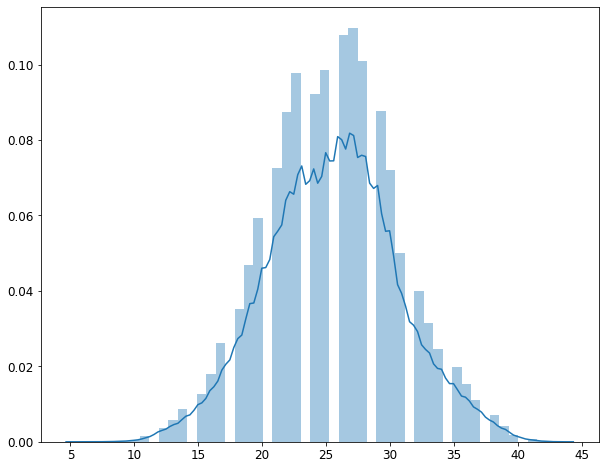

In [32]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (10,8))
plot = sns.distplot(lenghts_encoded)


In [33]:
plot = plot.get_figure()
plot.savefig("plots/encoded_smiles_distrib.png")

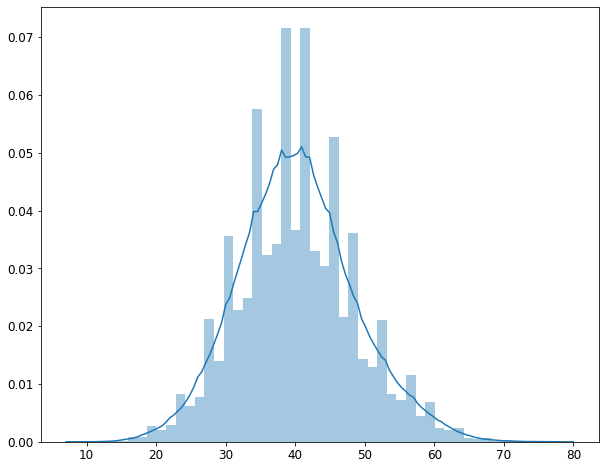

In [34]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (10,8))
plot = sns.distplot(lenght_smiles_basic)



In [35]:
plot = plot.get_figure()
plot.savefig("plots/basic_smiles_distrib.png")